# TIME SERIES ANALYSIS
# Muci Yu my1826
# Goal: Find trends and periodicity in the MTA turnstyle data
    

## Load Data:
MTA subway fares. It is a complete dataset of
rides logged by card swipes for 600 Manhattan stations.

The data was organized  by Sina Kashuk at CUSP.

It contains 23 different subway card types 
(e.g. monthly pass, daily pass, Act for Disability pass…) as follows:


In [4]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import pylab as pl
import os
import zipfile
import urllib

from sklearn.ensemble  import RandomForestClassifier as rfc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import statsmodels.api as sm

%pylab inline


%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


In [21]:
url = 'https://github.com/muciyuallen/PUI2018_my1826/blob/master/HW11_my1826/MTA_Fare.npy?raw=true'
file = 'MTA_fare.npy'
urllib.request.urlretrieve(url, file)
mta = np.load(file)

In [22]:
print ("MTA array shape:", mta.shape)
print ("MTA array shape summed over all ride types:", np.nansum(mta,axis=1).shape)

MTA array shape: (600, 23, 194)
MTA array shape summed over all ride types: (600, 194)


# Fourier Transformation:
**Several stations show a prominent annual periodicity. Identify the 4 **stations** (indentify them by the index of their location in the data cube) that show the most prominent periodic trend on an annual period (**52 weeks**). (Can you figure out what the periodic peak in rides is due to?)**

In [72]:
mta_stationT = np.nanmean(mta, axis = 0)
mta_station_df = pd.DataFrame(mta_stationT)
mta_station_df.columns = ['time_%d'%x for x in range(mta.shape[2])]
mta_station_df.head()

,time_0,time_1,time_2,time_3,time_4,time_5,time_6,time_7,time_8,time_9,...,time_184,time_185,time_186,time_187,time_188,time_189,time_190,time_191,time_192,time_193
0,19157.461667,20877.866667,21277.483333,21089.230000,21349.263333,19049.410000,20577.901667,20961.035000,20728.296667,20718.533333,...,24339.815000,18908.011667,18705.488333,21441.211667,21507.790000,19888.053333,21898.703333,21982.453333,20834.365000,20766.348333
1,883.976667,972.323333,976.761667,937.441667,914.536667,759.256667,863.418333,855.456667,853.425000,870.720000,...,1302.316667,993.671667,864.698333,1107.321667,1241.421667,1021.926667,1189.298333,1158.326667,1116.818333,1132.265000
2,79.438333,85.578333,85.831667,86.543333,85.028333,77.858333,81.378333,82.485000,81.488333,83.731667,...,104.198333,84.470000,75.026667,93.318333,100.486667,85.876667,95.116667,97.721667,93.980000,91.756667
3,310.688333,331.816667,332.551667,327.086667,324.578333,292.518333,313.885000,313.253333,311.141667,317.318333,...,321.881667,274.115000,247.525000,296.245000,322.350000,281.323333,315.710000,306.835000,299.820000,298.708333
4,77.783333,107.023333,94.761667,62.153333,58.456667,77.853333,100.148333,78.835000,53.245000,86.723333,...,94.220000,37.475000,41.940000,112.625000,107.883333,72.146667,79.443333,101.605000,98.771667,77.868333


In [77]:
import operator
stationdict = {}
for i in range(len(mta)):
    mta_station = np.nanmean(mta[i], axis=0)
    f = np.abs(np.fft.rfft(mta_station))**2
    stationdict[i] = f[4]

sorted_dict = sorted(stationdict.items(), key = operator.itemgetter(1)
                     , reverse=True)
print("The 4 stations that have strongest periodic trends are")
for id, value in sorted_dict[:4]:
    print("Station %d with value %d"%(id,value))

The 4 stations that have strongest periodic trends are
Station 0 with value 16789228933
Station 194 with value 16455038602
Station 150 with value 16249402832
Station 327 with value 10908503662


#### Visualizing the four stations

Text(0, 0.5, 'Average swipes')

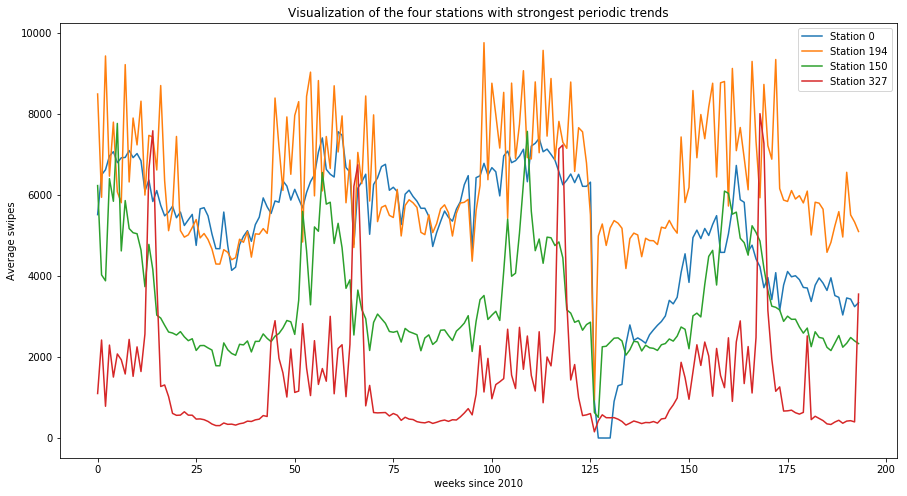

In [78]:
plt.figure(figsize=(15,8))
for id, value in sorted_dict[:4]:
    plt.plot(np.nanmean(mta[id,:,:], axis = 0),label='Station %s'%id)
plt.title("Visualization of the four stations with strongest periodic trends")
plt.legend()
plt.xlabel("weeks since 2010")
plt.ylabel("Average swipes")

Figure 1: All of these four stations display strong annual trends. They all have large number of swipes in the first half of the year and then much lower in the second half. 

# Extra Credit - Clustering the time series

In [106]:
mta_stationT = np.nanmean(mta, axis = 1)
mta_station_df = pd.DataFrame(mta_stationT)
mta_station_df.columns = ['week_%d'%x for x in range(mta.shape[2])]
mta_station_df.head()

,week_0,week_1,week_2,week_3,week_4,week_5,week_6,week_7,week_8,week_9,...,week_184,week_185,week_186,week_187,week_188,week_189,week_190,week_191,week_192,week_193
0,5516.391304,6498.956522,6625.304348,6964.086957,7071.304348,6800.565217,6919.782609,6929.260870,7099.304348,6923.956522,...,3824.913043,3644.565217,3956.565217,3517.739130,3473.521739,3038.304348,3458.695652,3430.478261,3243.086957,3340.565217
1,1621.956522,2020.130435,2146.000000,1949.913043,1804.695652,1550.130435,1825.565217,1822.086957,1791.869565,1788.739130,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
2,287.173913,299.130435,314.260870,249.130435,305.695652,222.000000,238.956522,246.391304,241.478261,301.782609,...,359.478261,257.739130,245.913043,333.260870,364.217391,319.260870,336.652174,355.260870,343.782609,295.217391
3,712.043478,756.826087,764.956522,619.173913,764.695652,572.478261,630.826087,625.521739,618.260870,746.913043,...,1019.565217,705.565217,677.652174,948.086957,1023.217391,895.826087,929.130435,976.478261,990.130435,827.521739
4,807.086957,865.304348,867.260870,698.913043,881.826087,634.782609,702.173913,698.478261,704.521739,852.956522,...,1001.086957,793.608696,751.869565,934.086957,978.956522,893.913043,954.000000,1012.304348,999.434783,937.478261


In [107]:
mta_station_df = mta_station_df[mta_station_df.std(1)>0]
mta_std = ((mta_station_df.T - mta_station_df.mean(1)) / mta_station_df.std(1)).T
mta_std.head()
print("standard deviation of the rows : ", mta_std.std(axis=1).mean())
print("mean of the rows : ", mta_std.mean(axis=1).mean())

mta_std.dropna().shape

standard deviation of the rows :  1.0
mean of the rows :  -2.6484652504286616e-17


(471, 194)

In [108]:
#cluster with kmeans
from sklearn.cluster import KMeans


nc = 4
km = KMeans(n_clusters=nc, random_state=444).fit(mta_std)
clust_dict = dict(zip(mta_std.index, km.labels_))

In [109]:
def map_clust(x):
    try:
        return clust_dict[x]
    except KeyError:
        return None

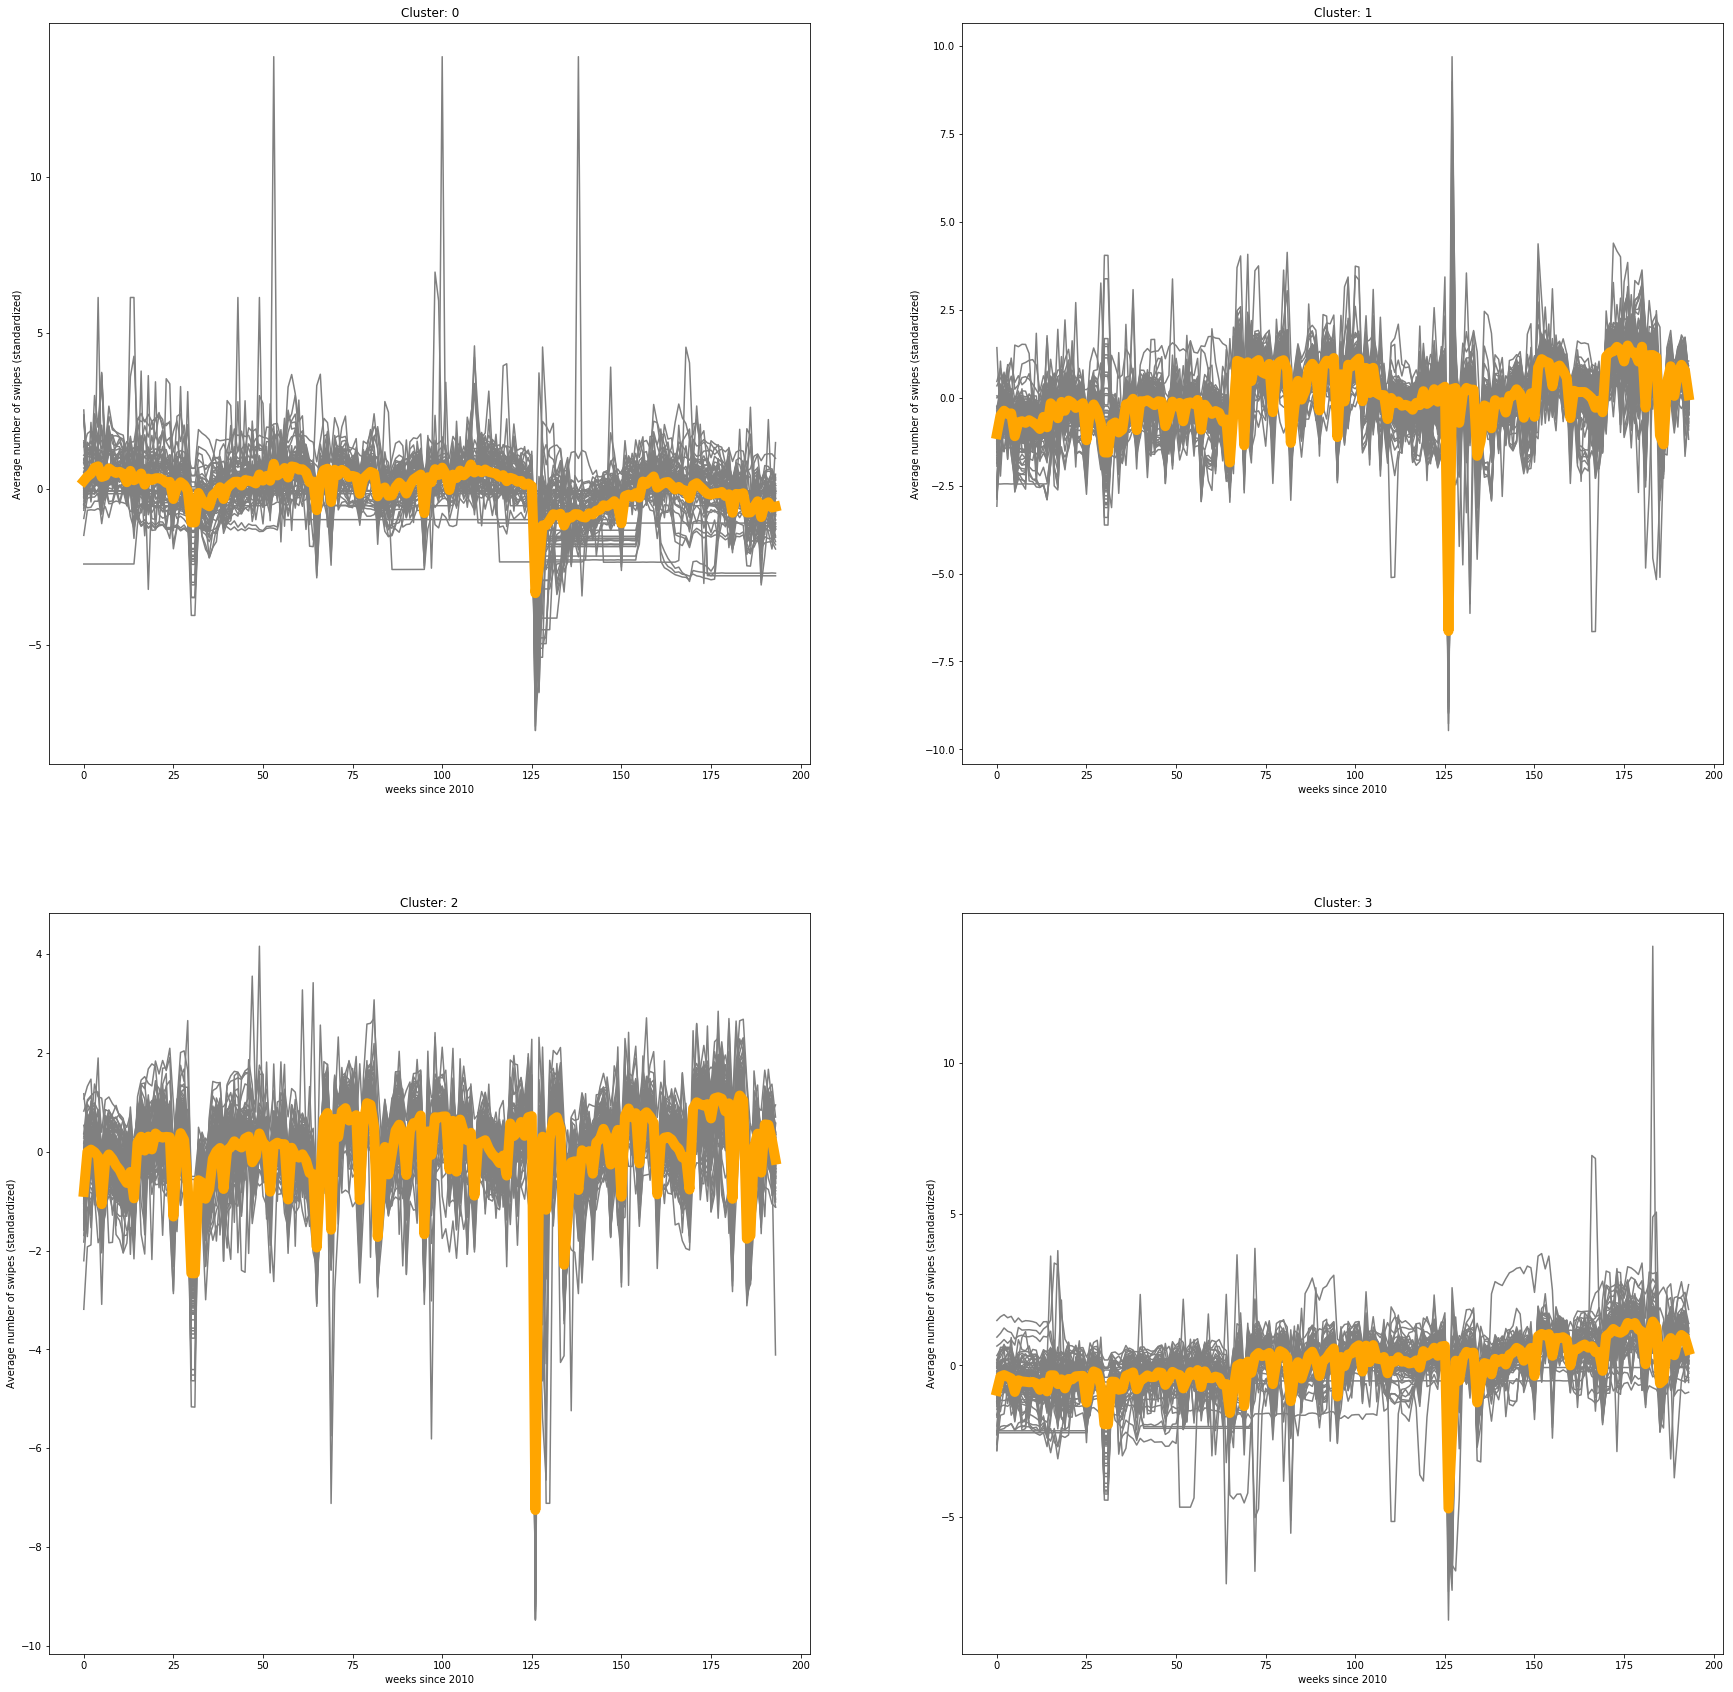

In [112]:
mta_std['clust'] = [map_clust(x) for x in mta_std.index]

f, axis = plt.subplots(2, 2, figsize=(30,30))


for c in range(max(mta_std.clust)+1):
    row = c//2
    col = c%2
    plt.subplot(220+(c+1))
    for idx, rows in mta_std[mta_std.clust == c].iterrows():
        plt.plot(list(range(mta_std.shape[1]-1)), rows[:-1], color = 'grey' )
    plt.plot(list(range(mta_std.shape[1]-1)), km.cluster_centers_[c], color = 'orange', lw =10)
    plt.title('Cluster: %s'%c)
    plt.xlabel('weeks since 2010')
    plt.ylabel('Average number of swipes (standardized)')

Figure 2: These graphs display four clusters by KMeans. They somehow represent very similar trends. 